In [3]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=92e35e8d2456ad1ac2510fe21339e832448af5ae57fdea74908139abbdd596ce
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Declarar universo de discurso
#Velocidad del avion
velocidad = ctrl.Antecedent(np.arange(0,1001,1), 'velocidad')
#Ángulo de Turbulencia
angulo = ctrl.Antecedent(np.arange(-10,11,0.1), 'angulo')
#Posición del timón
posicion = ctrl.Consequent(np.arange(0,11,1), 'posicion')

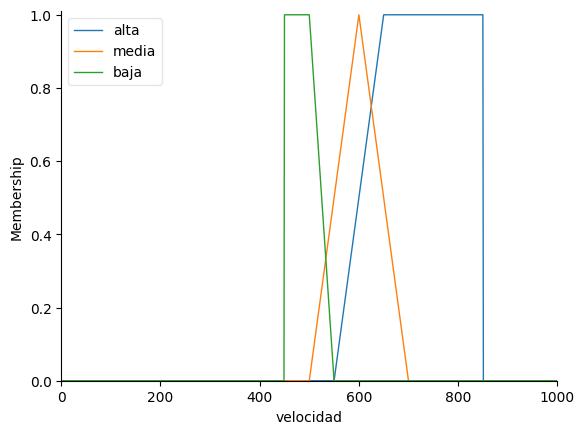

In [22]:
#Crear Conjuntos borrosos
#Velocidad del avión
velocidad['alta'] = skfuzzy.trapmf(velocidad.universe, [550,650,850,850])
velocidad['media'] = skfuzzy.trimf(velocidad.universe, [500,600,700])
velocidad['baja'] = skfuzzy.trapmf(velocidad.universe, [450,450,500,550])
velocidad.view()
plt.show()

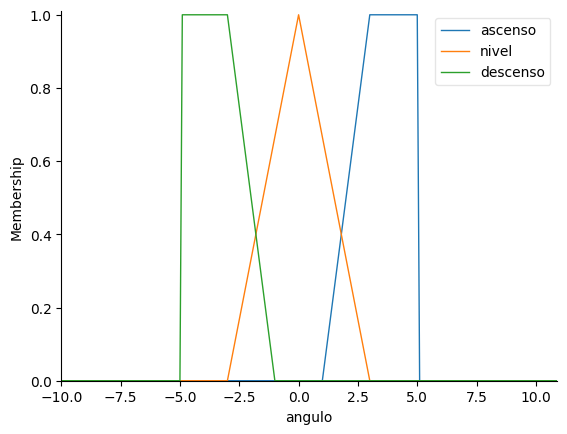

In [23]:
#Crear Conjuntos borrosos
#angulo del avión
angulo['ascenso'] = skfuzzy.trapmf(angulo.universe, [1,3,5,5])
angulo['nivel'] = skfuzzy.trimf(angulo.universe, [-3,0,3])
angulo['descenso'] = skfuzzy.trapmf(angulo.universe, [-5,-5,-3,-1])
angulo.view()
plt.show()

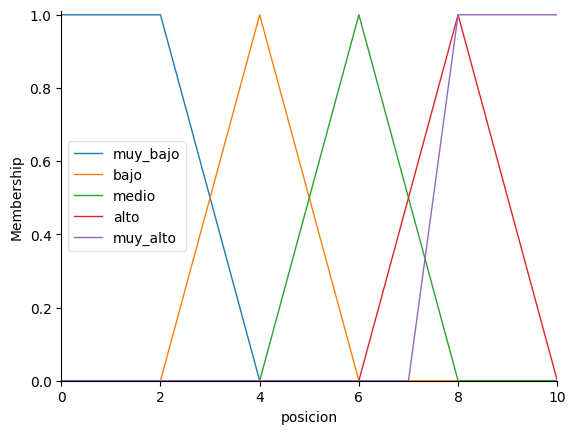

In [24]:
#Crear Conjuntos borrosos
#posicion del avión
posicion['muy_bajo'] = skfuzzy.trapmf(posicion.universe, [0,0,2,4])
posicion['bajo'] = skfuzzy.trimf(posicion.universe, [2,4,6])
posicion['medio'] = skfuzzy.trimf(posicion.universe, [4,6,8])
posicion['alto'] = skfuzzy.trimf(posicion.universe, [6,8,10])
posicion['muy_alto'] = skfuzzy.trapmf(posicion.universe, [7,8,10,10])
posicion.view()
plt.show()

In [25]:
#Motor de reglas o motor de inferencia
regla1 = ctrl.Rule(velocidad['alta'] & angulo['ascenso'], posicion['bajo'])
regla2 = ctrl.Rule(velocidad['alta'] & angulo['nivel'], posicion['bajo'])
regla3 = ctrl.Rule(velocidad['alta'] & angulo['descenso'], posicion['alto'])
regla4 = ctrl.Rule(velocidad['media'] & angulo['ascenso'], posicion['medio'])
regla5 = ctrl.Rule(velocidad['media'] & angulo['nivel'], posicion['medio'])
regla6 = ctrl.Rule(velocidad['media'] & angulo['descenso'], posicion['alto'])
regla7 = ctrl.Rule(velocidad['baja'] & angulo['ascenso'], posicion['muy_bajo'])
regla8 = ctrl.Rule(velocidad['baja'] & angulo['nivel'], posicion['medio'])
regla9 = ctrl.Rule(velocidad['baja'] & angulo['descenso'], posicion['muy_alto'])

In [26]:
#Activar el motor de inferencia
controlVuelo = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9])

In [31]:
#Implementar ejercicio 1
#Velocidad = 515
#Ángulo = -2.5
posicionTimon = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon.input['velocidad'] = 515
posicionTimon.input['angulo'] = -2.5
posicionTimon.compute()

In [32]:
posicionTimon.output['posicion']

8.022095282505633

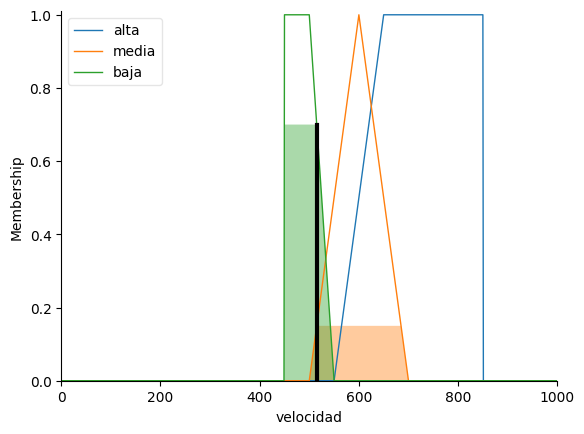

In [33]:
velocidad.view(sim = posicionTimon)
plt.show()

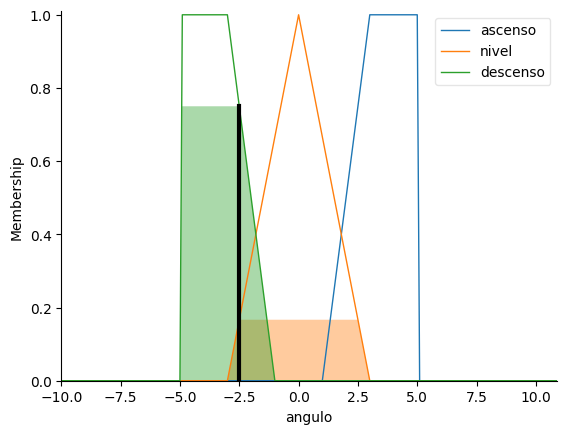

In [35]:
angulo.view(sim = posicionTimon)
plt.show()

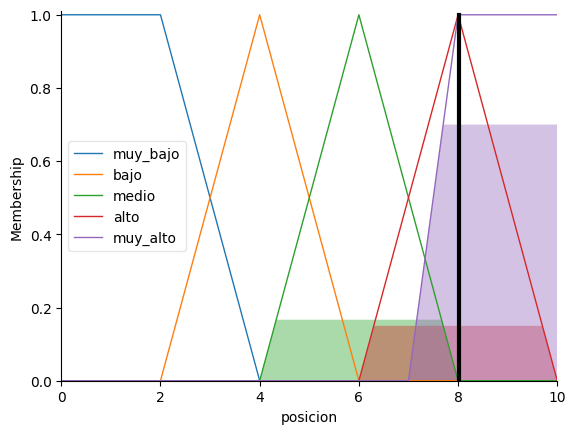

In [34]:
posicion.view(sim = posicionTimon)
plt.show()

In [36]:
#Implementar ejercicio 1
#Velocidad = 515
#Ángulo = -2.5
posicionTimon2 = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon2.input['velocidad'] = 700
posicionTimon2.input['angulo'] = 3
posicionTimon2.compute()

In [41]:
posicionTimon2.output['posicion']

3.9999999999999996

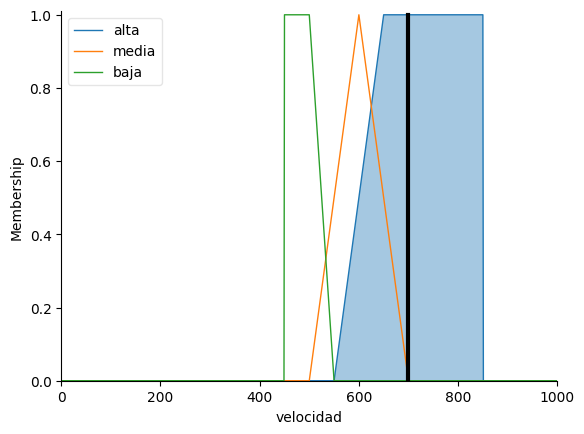

In [38]:
velocidad.view(sim = posicionTimon2)
plt.show()

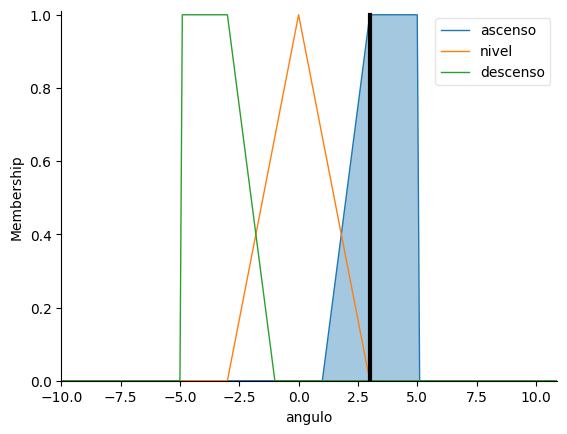

In [39]:
angulo.view(sim = posicionTimon2)
plt.show()

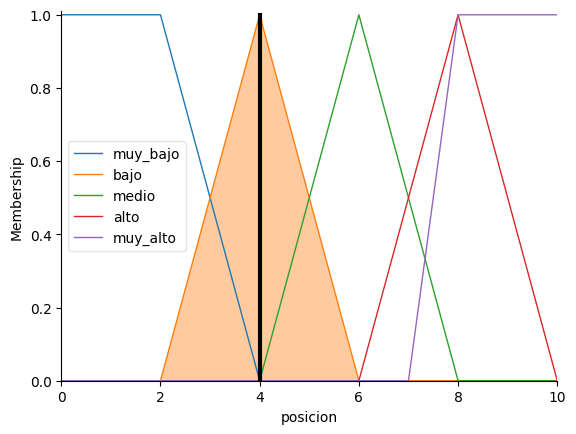

In [40]:
posicion.view(sim = posicionTimon2)
plt.show()